In [1]:
import pandas as pd

In [33]:
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 , 71400]}
car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182 , 160]}

df1 = pd.DataFrame(Car_Price)
df2 = pd.DataFrame(car_Horsepower)
car_data = df1.merge(df2)
car_data

,Company,Price,horsepower
0,Toyota,23845,141
1,Honda,17995,80
2,BMV,135925,182
3,Audi,71400,160


In [72]:
dataset = pd.read_csv("Automobile_data.csv", index_col="index")
dataset.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [73]:
dataset["company"][dataset["price"] == max(dataset['price'])]

index
47    mercedes-benz
Name: company, dtype: object

In [76]:
dataset["company"].value_counts()

toyota           7
bmw              6
mazda            5
nissan           5
audi             4
mercedes-benz    4
mitsubishi       4
volkswagen       4
alfa-romero      3
chevrolet        3
honda            3
isuzu            3
jaguar           3
porsche          3
dodge            2
volvo            2
Name: company, dtype: int64

In [89]:
df = dataset.groupby(['company']).min()['price']
df.name = "lowest price"
print(df)

company
alfa-romero      13495.0
audi             13950.0
bmw              16430.0
chevrolet         5151.0
dodge             6229.0
honda             7295.0
isuzu             6785.0
jaguar           32250.0
mazda             5195.0
mercedes-benz    25552.0
mitsubishi        5389.0
nissan            6649.0
porsche          34028.0
toyota            5348.0
volkswagen        7775.0
volvo            12940.0
Name: lowest price, dtype: float64


<AxesSubplot:xlabel='company'>

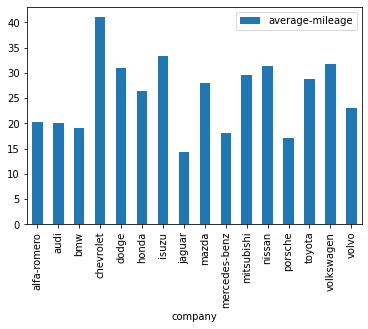

In [133]:
df = dataset.groupby(['company']).mean()['average-mileage']
df.plot.bar(legend=True)

In [116]:
dataset[["company", "price"]].sort_values("price", na_position='first')

,company,price
index,,
31,isuzu,NaN
32,isuzu,NaN
63,porsche,NaN
16,chevrolet,5151.0
36,mazda,5195.0
...,...,...
15,bmw,36880.0
62,porsche,37028.0
46,mercedes-benz,40960.0


In [153]:
import matplotlib.pyplot as plt
df_engine = dataset["engine-type"].value_counts()
df_cylinder = dataset[ "num-of-cylinders"].value_counts()
print(df_cylinder, df_engine)

four      39
six       11
five       5
eight      3
three      1
twelve     1
two        1
Name: num-of-cylinders, dtype: int64 ohc      46
dohc      5
ohcv      5
ohcf      2
l         1
rotor     1
dohcv     1
Name: engine-type, dtype: int64


In [174]:
avg_price = dataset.groupby(['company']).mean()['price']
body_style = dataset['body-style']
body_style

index
0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
         ...     
81          sedan
82          sedan
86          sedan
87          sedan
88          wagon
Name: body-style, Length: 61, dtype: object

In [187]:
from numpy.random import randint
data = randint(1,50000, size=(20, 5))
data_df = pd.DataFrame(data, columns=["Col-1", "Col-2", "Col-3", "Col-4", "Col-5"])

# Section - A
print("\n----------- Section - A -----------")
print("{:.3f}".format(data_df["Col-2"].mean()))

# Section - B
print("\n----------- Section - B -----------")
data_df[["Col-3", "Col-4"]][10:].mean()


----------- Section - A -----------
28671.150

----------- Section - B -----------


Col-3    19417.8
Col-4    25787.1
dtype: float64

<AxesSubplot:>

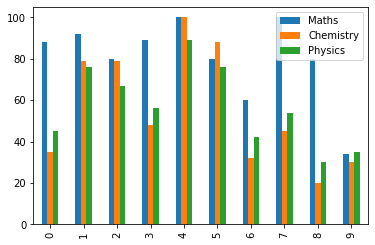

In [196]:
math_marks = [88, 92, 80, 89, 100, 80, 60, 100, 80, 34]
chemistry_marks = [35, 79, 79, 48, 100, 88, 32, 45, 20, 30]
physics_marks = [45, 76, 67, 56, 89, 76, 42, 54, 30, 35]
marks_list = list(zip(math_marks, chemistry_marks, physics_marks))
marks_df = pd.DataFrame(marks_list, columns=["Maths", "Chemistry", "Physics"])
marks_df.plot.bar(legend=True)

In [29]:
raw_dates = pd.Series(["01 Jan 2015", "10-02-2016", "20180307", "2014/05/06", "2016-04-12", "2019-04-06T11:20"], name="Date")
dates = pd.to_datetime(raw_dates)
print("Day Of Month\n", list(dates.dt.day))
print("\nDay Of Year\n", list(dates.dt.day_of_year))
print("\nWeek Number\n", list(dates.dt.isocalendar().week))                 # deprecated -> dates.dt.week
print("\nDay Of Week:\n", list(dates.dt.day_name()))

Day Of Month
 [1, 2, 7, 6, 12, 6]

Day Of Year
 [1, 276, 66, 126, 103, 96]

Week Number
 [1, 39, 10, 19, 15, 14]

Day Of Week:
 ['Thursday', 'Sunday', 'Wednesday', 'Tuesday', 'Tuesday', 'Saturday']


In [55]:
day = int(input("New Date: "))
raw_dates = pd.Series(["Jan 2015", "Feb 2016", "Mar 2017", "Apr 2018", "May 2019"])
dates = pd.to_datetime(raw_dates)
new_dates = dates.apply(lambda dt: dt.replace(day=day))
new_dates

0   2015-01-11
1   2016-02-11
2   2017-03-11
3   2018-04-11
4   2019-05-11
dtype: datetime64[ns]

In [40]:
def findVol(string):
    lstString = list(string)
    vowels = ['a', 'e', 'i', 'o', 'u']
    frq = True if len([c for c in lstString if c in vowels]) >= 2 else False
    return frq

fruits = pd.Series(["Red", "Green", "Orange", "Pink", "Yellow", "White"])
fruits_new = fruits.apply(lambda ft: findVol(ft))
fruits[fruits_new]

1     Green
2    Orange
4    Yellow
5     White
dtype: object

In [45]:
from numpy.linalg import norm as find_eclidis
cord1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
cord2 = pd.Series([11, 8, 7, 5, 6, 5, 3, 4, 7, 1])
eclidis = find_eclidis(cord1 - cord2)
eclidis

16.492422502470642

In [65]:
def foo(data):
    """
    LOGIC:
    ------
    for idx in range(len(data)):
        if idx + 2 >= len(data):
            break
        if data[idx] < data[idx+1] > data[idx+2]:
            print(idx+1)
    """
    # Oneliner Are Always Amazing
    return [idx+1 for idx in range(len(data)) if idx + 2 < len(data) if data[idx] < data[idx+1] > data[idx+2]]


data = pd.Series([1, 8, 7, 5, 6, 5, 3, 4, 7, 1])
result = foo(data)
print(result)

[1, 4, 8]


In [16]:
from numpy import random
data = pd.Series(random.normal(1, 10, 15))
autocorr = [data.autocorr(i).round(2) for i in range(11)]
autocorr

[1.0, -0.36, 0.11, 0.49, -0.63, 0.6, 0.11, -0.49, 0.71, -0.19, 0.02]

In [8]:
from numpy import nan
exam_data = {
    'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, nan, 9, 20, 14.5, nan, 8, 19],
    'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']
    }
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
colors = ["Red", "Green", "Blue", "Orange", "Purple", "Red", "Sky", "Yellow", "Green", "Pink"]

df = pd.DataFrame(exam_data, index = labels)
df['Color'] = colors
print(df)

        name  score  attempts qualify   Color
a  Anastasia   12.5         1     yes     Red
b       Dima    9.0         3      no   Green
c  Katherine   16.5         2     yes    Blue
d      James    NaN         3      no  Orange
e      Emily    9.0         2      no  Purple
f    Michael   20.0         3     yes     Red
g    Matthew   14.5         1     yes     Sky
h      Laura    NaN         1      no  Yellow
i      Kevin    8.0         2      no   Green
j      Jonas   19.0         1     yes    Pink


In [17]:
countries = ("India", "United States", "United Kingdom", "Japan", "China")
find_idx = input(f"{countries}\n\n Select Any One Country From Above: ").capitalize()
print(countries.index(find_idx))

3


In [28]:
print("Enter Any Four Food Items :-")
catlog = {i:input() for i in range(1, 5)}
print("\n", catlog)
cho = int(input("Which Item Do You Wanna To Remove (index no.): "))
catlog.pop(cho)
print("\n-----------------------------------")
print("Your New Item List Is Ready")
print(catlog)

Enter Any Four Food Items :-

 {1: 'a', 2: 'b', 3: 'c', 4: 'd'}

-----------------------------------
Your New Item List Is Ready
{1: 'a', 2: 'b', 4: 'd'}


In [29]:
set1 = {1, 2, 3, 4, 5, 6, 7, 8}
set2 = {1, 2, 3, 4, 5, 6, 10, 11}
if len(set1 & set2) == 0:
    print("No Common Elements Found")
else:
    print("Common Elements Found")

{1, 2, 3, 4, 5, 6}

In [32]:
set1 = {1, 2, 3, 4, 5, 6, 7, 8}
set2 = {1, 2, 3, 4, 5, 6, 10, 11}

print("Is set1 is superset of itself : ", set1.issuperset(set1))
print("Is set1 is superset of set2 :", set1.issuperset(set2))

Is set1 is superset of itself :  True
Is set1 is superset of set2 : False
